<a href="https://colab.research.google.com/github/JinshiAshok/CodSoft/blob/main/car_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`SALES PREDICTION`**


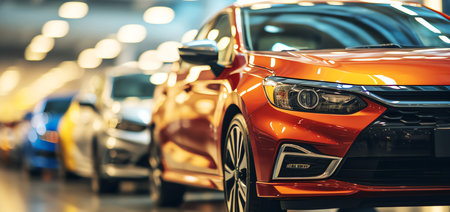

**AIM:**The aim of this project is to develop machine learning models that can accurately predict the car purchase amount based on various customer attributes.

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [ ]:
#takes a path to a CSV file and reads the data into a DataFrame
df=pd.read_csv("/content/car_purchasing.csv",encoding='latin')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
df.shape

(500, 9)

In [ ]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
credit card debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
net worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
car purchase amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [ ]:
df.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [ ]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [ ]:
df['customer name'].value_counts()

Seth                    2
Walter                  2
Martina Avila           1
Sexton, Shaeleigh H.    1
Holloway, Brennan Q.    1
                       ..
Holmes Irwin            1
Hector Price            1
Sebastian Marks         1
Marvin Garner           1
Marla                   1
Name: customer name, Length: 498, dtype: int64

In [ ]:
df['customer e-mail'].value_counts()

cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1
mi.eleifend.egestas@cursuset.net                     1
ut@Etiamvestibulum.ca                                1
nunc.sed.pede@Quisqueporttitor.net                   1
Cras.eu@vitaevelitegestas.net                        1
                                                    ..
Nunc.sed.orci@Namligulaelit.net                      1
Aliquam.nisl@semegetmassa.co.uk                      1
et.eros@feugiatmetussit.net                          1
in@sed.org                                           1
Camaron.marla@hotmail.com                            1
Name: customer e-mail, Length: 500, dtype: int64

In [ ]:
df['country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: country, Length: 211, dtype: int64

In [ ]:
df.drop(['customer name','customer e-mail'],axis=1,inplace=True)
df

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
top_n = df['country'].value_counts().head(10).sort_values()
print(top_n)

Greenland           5
Saint Barthélemy    5
Guinea              5
Iraq                5
Samoa               5
Liechtenstein       5
Bhutan              5
Israel              6
Mauritania          6
Bolivia             6
Name: country, dtype: int64


**`DATA VISUALIZATION`**

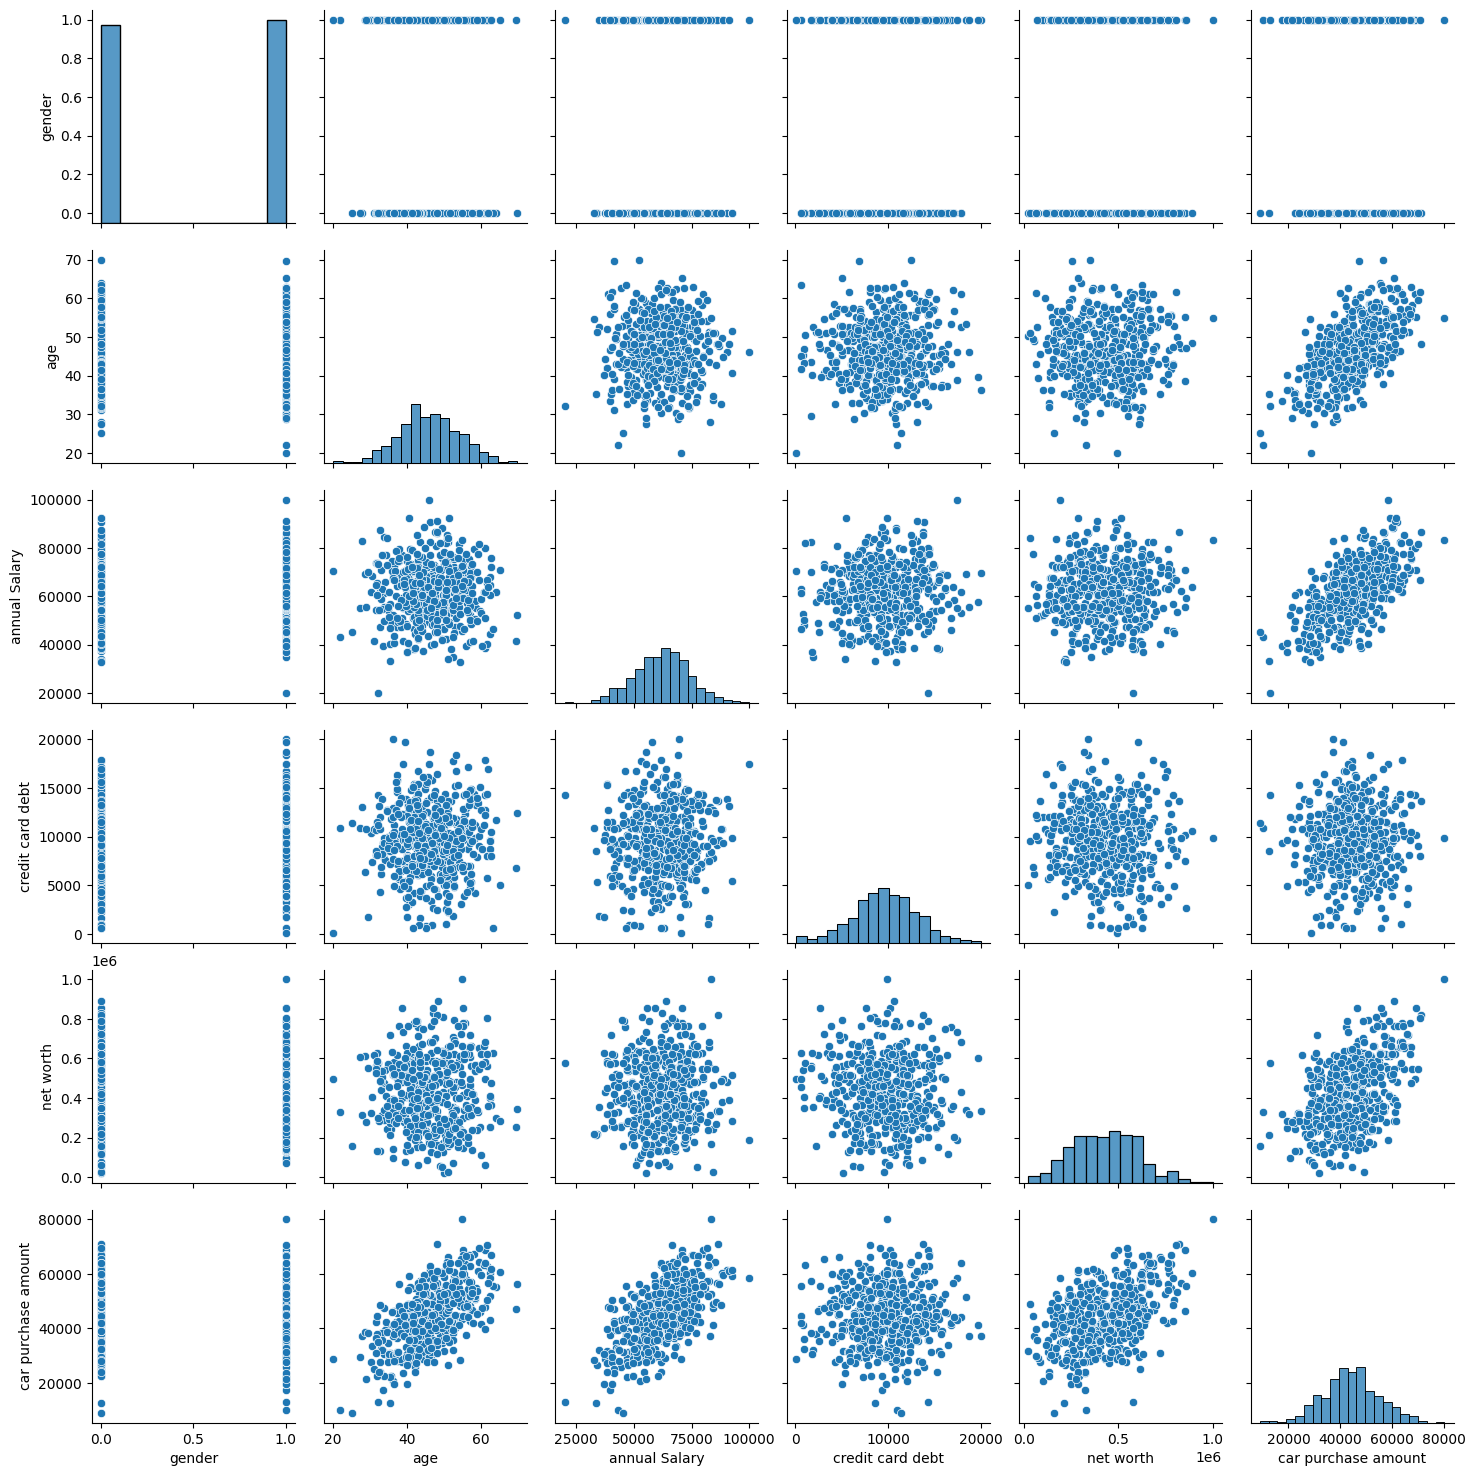

In [ ]:
sns.pairplot(df)

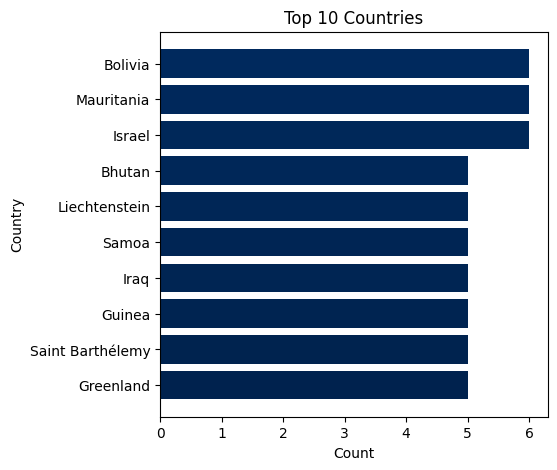

In [ ]:
plt.figure(figsize=(5,5))
colors = plt.cm.cividis(range(len(top_n)))
# Plot horizontal bar chart with colors
plt.barh(top_n.index, top_n.values, color=colors)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Countries")
plt.show()

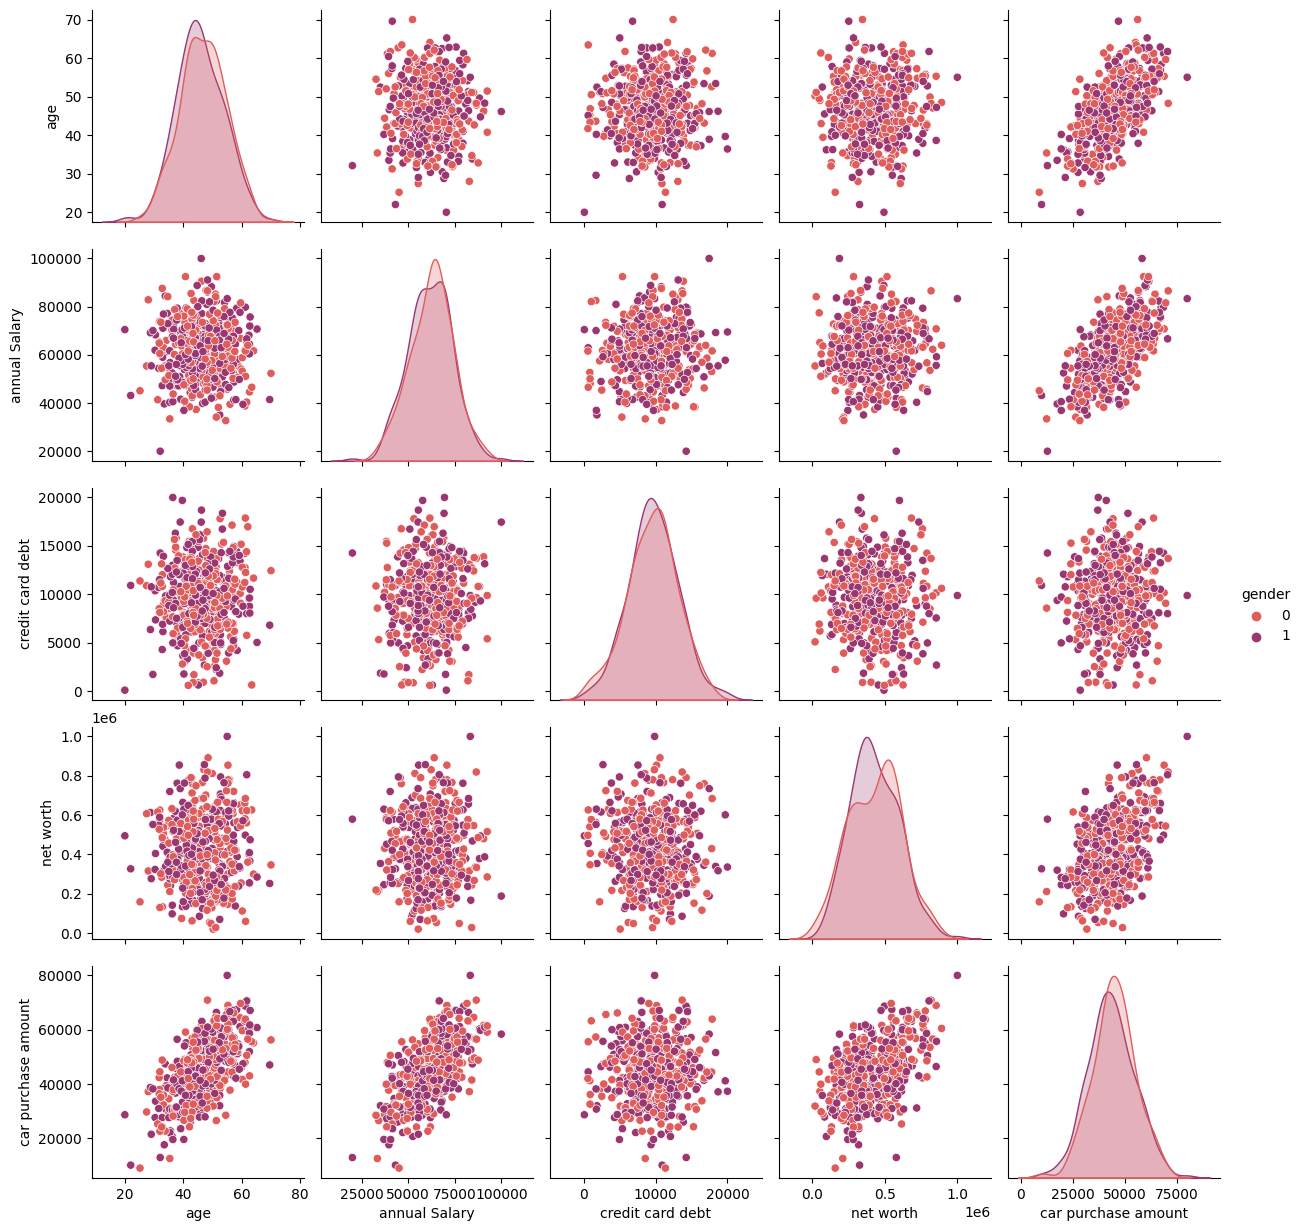

In [ ]:
sns.pairplot(df,hue='gender',palette='flare')

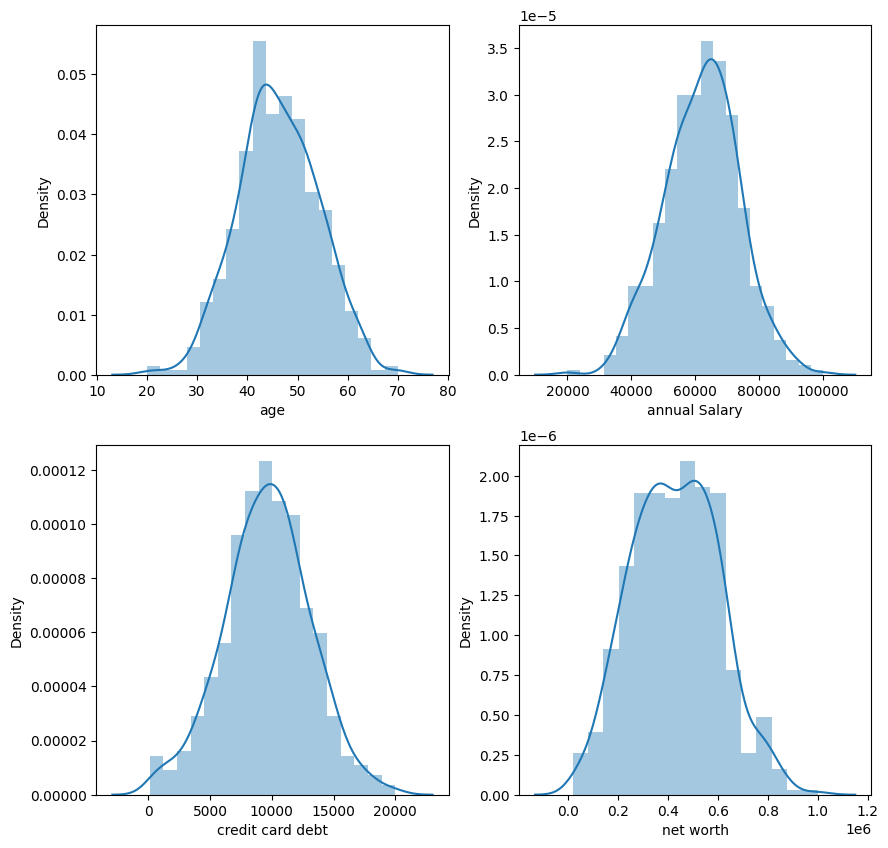

In [ ]:
numeric_columns=['age','annual Salary','credit card debt','net worth']
plt.figure(figsize=(10,10))
for i in enumerate(numeric_columns):
  plt.subplot(2,2,i[0]+1)
  sns.distplot(df[i[1]])

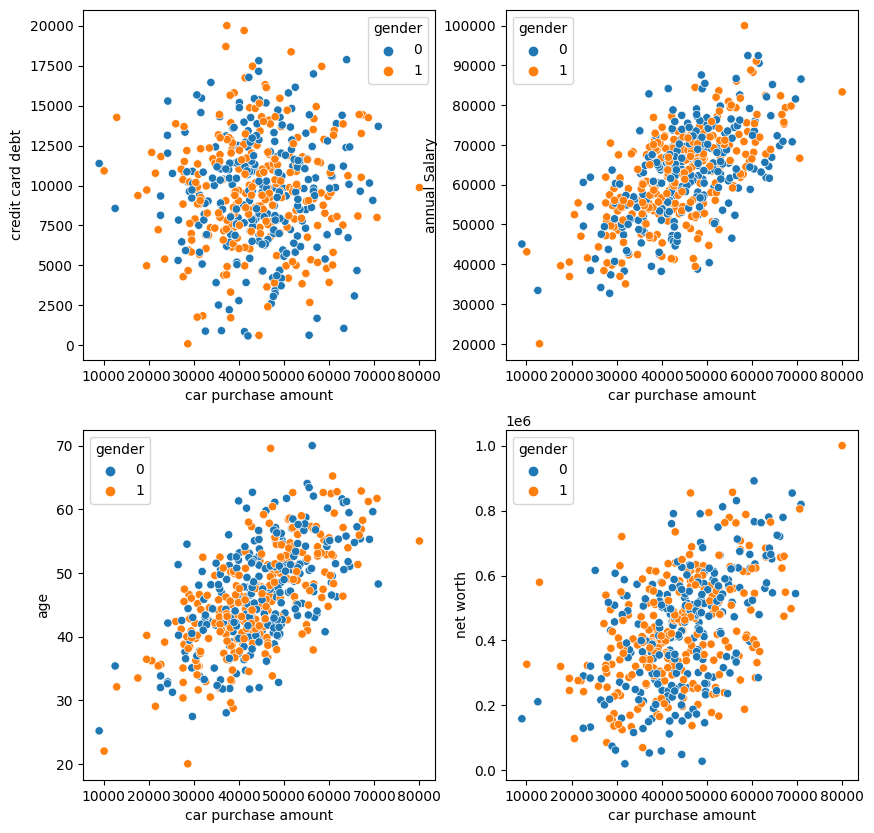

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
  sns.scatterplot(x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender' )

**`CORRELATION`**

In [ ]:
df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


<Axes: >

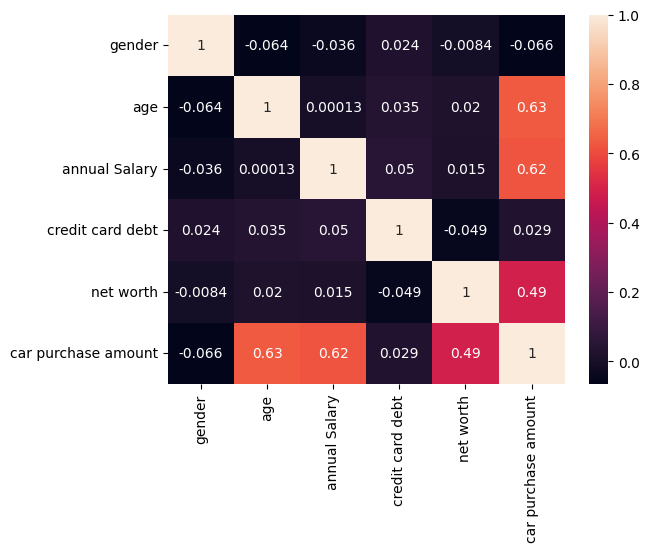

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.dtypes

country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [ ]:
lst = df.select_dtypes(include=['float', 'int64']).columns.tolist()
lst

['gender',
 'age',
 'annual Salary',
 'credit card debt',
 'net worth',
 'car purchase amount']

In [ ]:
df.nunique()

country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [ ]:
cols=df.columns
for i in cols:
  print(i, df[i].unique(), '\n')

country ['Bulgaria' 'Belize' 'Algeria' 'Cook Islands' 'Brazil' 'Liberia' 'Syria'
 'Czech Republic' 'Armenia' 'Somalia' 'Sint Maarten' 'Greenland'
 'Nicaragua' 'Palestine, State of' 'United Arab Emirates' 'Gabon'
 'Tokelau' 'Portugal' 'Chad' 'Iraq' 'Sudan' 'Angola' 'Nigeria'
 'Madagascar' 'Macedonia' 'Oman' 'Colombia' 'Namibia' 'Denmark'
 'Dominican Republic' 'Costa Rica' 'Botswana' 'Saint Pierre and Miquelon'
 'France' 'Senegal' 'Cambodia' 'Suriname' 'Turkey' 'Ethiopia'
 'French Guiana' 'Bhutan' 'Georgia' 'Mozambique' 'Nauru' 'Timor-Leste'
 'Djibouti' 'Argentina' 'Taiwan' 'Åland Islands'
 'Turks and Caicos Islands' 'Samoa' 'Vanuatu' 'Mongolia' 'Sri Lanka'
 'Guinea-Bissau' 'Egypt' 'Slovenia' 'Benin' 'Cape Verde' 'Paraguay' 'Laos'
 'Iceland' 'Viet Nam' 'Marshall Islands' 'Germany' 'Kyrgyzstan'
 'Mauritius' 'Gambia' 'Reunion' 'Jordan' 'Slovakia' 'Kiribati'
 'United States Minor Outlying Islands' 'Puerto Rico' 'Guinea' 'Guam'
 'China' 'Sierra Leone' 'Ecuador' 'Anguilla' 'Kazakhstan' 'Jerse

In [ ]:
df['gender'].value_counts()

1    253
0    247
Name: gender, dtype: int64

In [ ]:
df.drop(['country'],axis=1,inplace=True)
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


**`REMOVING OUTLIERS`**

In [ ]:
numeric_columns=['age','annual Salary','credit card debt','net worth']

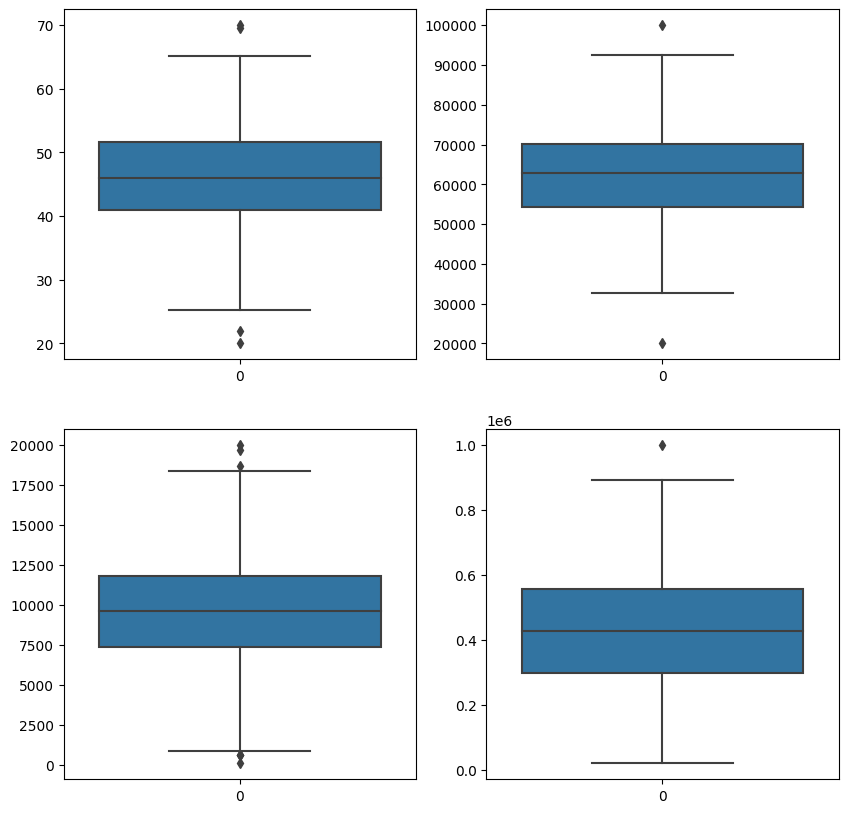

In [ ]:
plt.figure(figsize=(10,10))
for i in enumerate(numeric_columns):
  plt.subplot(2,2,i[0]+1)
  sns.boxplot(df[i[1]])

In [ ]:
def remove_outlier(df,numeric_columns):
  Q1=df[numeric_columns].quantile(0.25)
  Q3=df[numeric_columns].quantile(0.75)
  IQR=Q3-Q1
  df_out=df.loc[(df[numeric_columns]>Q1-1.5*IQR)&(df[numeric_columns]<Q3+1.5*IQR)]
  return df_out
df=remove_outlier(df,'age')
df=remove_outlier(df,'credit card debt')
df=remove_outlier(df,'net worth')
df=remove_outlier(df,'annual Salary')

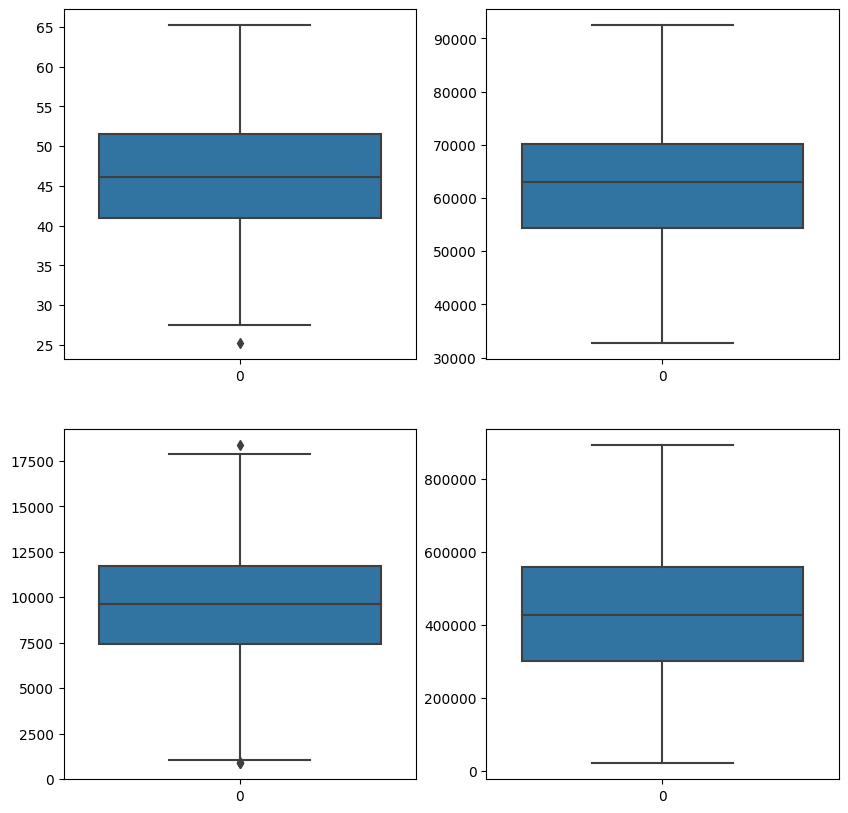

In [ ]:
plt.figure(figsize=(10,10))
for i in enumerate(numeric_columns):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])

In [ ]:
df.dtypes

gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [ ]:
x=df.drop(columns='car purchase amount',axis=1)
y=df['car purchase amount']
x

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [ ]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 487, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
sc_x=mm.fit_transform(x)
sc_x

array([[0.        , 0.41632742, 0.50380629, 0.61416645, 0.25126375],
       [0.        , 0.39182756, 0.56796214, 0.4977956 , 0.58635589],
       [1.        , 0.44882032, 0.35301057, 0.58850699, 0.70970723],
       ...,
       [1.        , 0.71828225, 0.60546867, 0.55714894, 0.85436912],
       [1.        , 0.84856101, 0.28631578, 0.75152253, 0.36471436],
       [1.        , 0.53817619, 0.47969155, 0.48741723, 0.50829266]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(sc_x,y,test_size=0.3,random_state=42)


# **`MODEL CREATION AND EVALUATION`**

**`1.MULTIPLE LINEAR REGRESSION`**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([52993.57473819, 24182.77163134, 27300.97656356, 41458.83786556,
       37376.45287913, 52785.80445662, 51684.49183062, 52952.72061497,
       45168.14272876, 59757.91550094, 38187.70485759, 30840.33955898,
       38241.46183831, 51922.54196576, 51732.0576832 , 55701.15027184,
       66645.01311944, 44649.36970447, 26502.15201788, 46012.94831914,
       41326.14400455, 52656.10137827, 61594.32820221, 50664.57861225,
        9001.50788501, 39433.52327588, 64189.11084463, 39002.79777782,
       38400.05980008, 45014.88633427, 46188.39317388, 24133.54015947,
       41425.95030246, 39810.37050366, 32207.59853744, 35320.68391329,
       42289.61578653, 48901.01950651, 48620.33409465, 34642.83381596,
       37257.30673235, 44734.85300503, 41678.83618265, 41351.77766917,
       50540.31268945, 44634.23969407, 64146.66906654, 31250.88341951,
       34921.29053626, 50933.63181492, 41565.6563302 , 47604.54406298,
       42214.74330666, 38170.85235274, 41904.56000487, 36638.24205092,
      

Text(0, 0.5, 'Actual Values')

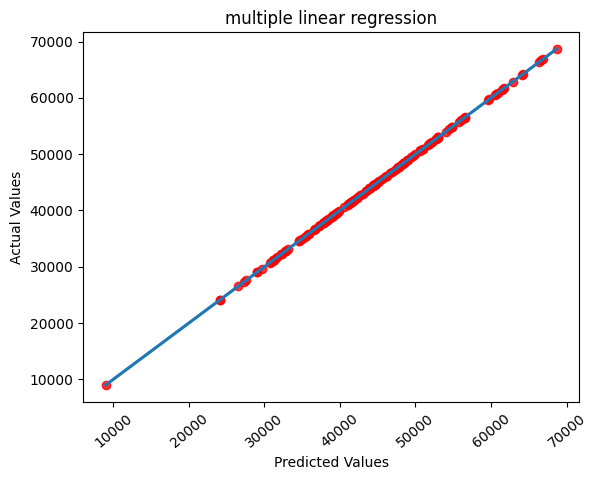

In [ ]:
# Visualizing the accuracy of our ML models
sns.regplot(x=y_pred, y=y_test,scatter_kws={'color': 'red'})
plt.xticks(rotation=40)
plt.title( "multiple linear regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 1.165609041353448


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print('error percentage',mean_absolute_percentage_error(y_test,y_pred))

error percentage 2.9244356774458833e-05


In [ ]:
print(r2_score(y_test,y_pred))
mr2=(r2_score(y_test,y_pred))

0.9999999777240616


**`2.RANDOM FOREST`**

In [ ]:
# Using a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([51524.009359 , 28815.1431056, 29257.3825056, 40191.892664 ,
       37065.2708008, 52924.7355019, 49957.8333934, 51963.7248567,
       45424.5203405, 54675.4360052, 37245.0230653, 31206.8611123,
       37925.0652291, 48356.9869777, 53972.8760076, 51187.9656249,
       64302.0007616, 44359.8630227, 31914.3039671, 46388.7785393,
       43869.8382436, 54424.220824 , 55393.48237  , 51414.7817427,
       21477.598718 , 40096.1079792, 61726.2970697, 39334.1125254,
       41658.7765473, 45685.1534729, 44825.7815203, 24167.3039457,
       41970.1978185, 41828.0627118, 33174.8979786, 38691.1292046,
       40822.2074979, 48585.615762 , 45756.0815254, 35819.5668423,
       38907.8301506, 45346.0203815, 43179.7134396, 42324.0318225,
       47522.2402636, 42465.6909621, 60718.6176918, 30709.349343 ,
       36651.6713178, 47691.8704079, 41164.1469558, 48293.9100182,
       43448.0905434, 38828.5300458, 43449.0147807, 37192.9944228,
       61242.3593037, 30866.7567562, 46143.1060285, 48194.3029

Text(0, 0.5, 'Actual Values')

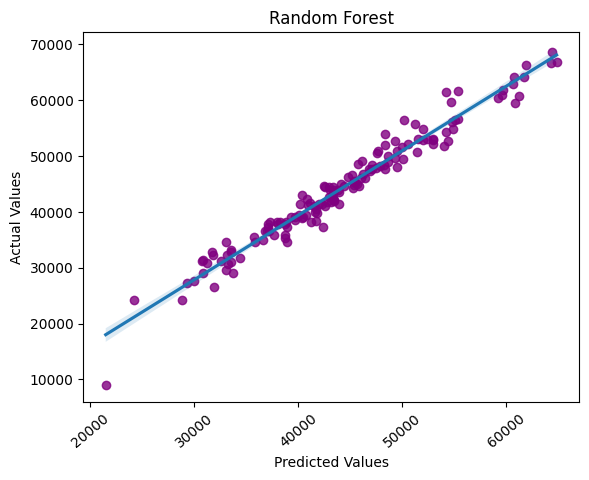

In [ ]:
# Visualizing the accuracy of our ML models
sns.regplot(x=rf_pred, y=y_test,scatter_kws={'color': 'purple'})
plt.xticks(rotation=40)
plt.title( "Random Forest")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [ ]:
print('MAE',mean_absolute_error(y_test,rf_pred))
print('error percentage',mean_absolute_percentage_error(y_test,rf_pred))
print(r2_score(y_test,rf_pred))
rr2=(r2_score(y_test,rf_pred))

MAE 1668.304208748298
error percentage 0.04628276881271473
0.9442885267161091


**`3.DECISION TREE`**


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_pred

array([49392.8897 , 35139.24793, 32553.53423, 43680.91327, 34139.6373 ,
       50296.67496, 51941.6756 , 49336.11628, 42774.35579, 55420.56668,
       39549.13039, 36517.70996, 30826.10903, 42978.34626, 54755.42038,
       43680.91327, 67120.89878, 41489.64123, 28463.64326, 42774.35579,
       42774.35579, 55167.37361, 52709.08196, 47869.82593, 21471.11367,
       36367.18452, 60526.97788, 33640.73697, 43724.4896 , 44418.60955,
       43994.35972, 22599.45863, 42925.70921, 41769.38288, 35457.1486 ,
       40660.38317, 42209.28948, 47610.11718, 49079.29461, 28700.0334 ,
       32700.27871, 45857.75365, 42774.35579, 41265.52929, 47443.74443,
       43264.04965, 58641.71051, 28031.20985, 43264.04965, 49373.37555,
       39888.59789, 47434.98265, 47380.91224, 31837.22537, 45115.52566,
       39606.24598, 60526.97788, 30394.82494, 43724.4896 , 48734.35708,
       33766.6413 , 40660.38317, 55420.56668, 48734.35708, 41769.38288,
       55125.93237, 43994.35972, 41575.34739, 25252.93221, 56563

Text(0, 0.5, 'Actual Values')

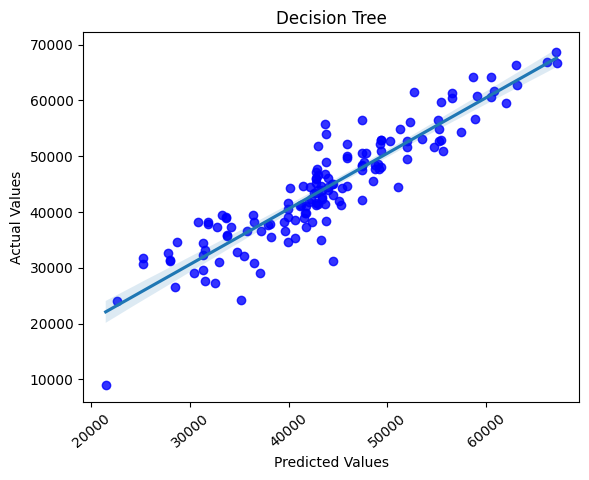

In [ ]:
# Visualizing the accuracy of our ML models
sns.regplot(x=dt_pred, y=y_test,scatter_kws={'color': 'blue'})
plt.xticks(rotation=40)
plt.title( "Decision Tree")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

**`COMPARISON OF R2 SCORES`**

In [ ]:
print('MAE',mean_absolute_error(y_test,dt_pred))
print('error percentage',mean_absolute_percentage_error(y_test,dt_pred))
print(r2_score(y_test,dt_pred))
dr2=(r2_score(y_test,dt_pred))

MAE 3092.4804937414974
error percentage 0.0826411377332223
0.8372351779203706


In [ ]:
model=['MULTIPLE LINEAR','RANDOM FOREST','DECISION TREE']
r2_score=[mr2,rr2,dr2]
r2_score

[0.9999999777240616, 0.9442885267161091, 0.8372351779203706]

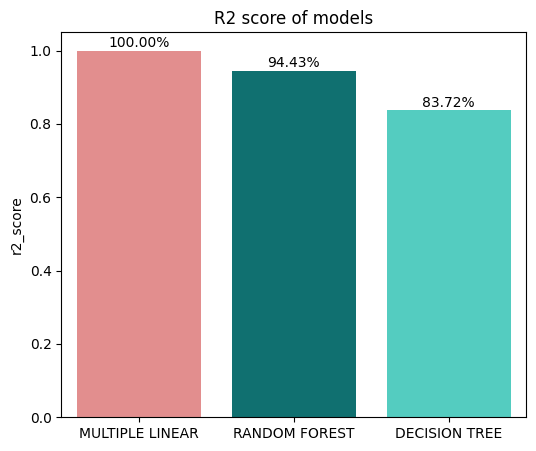

In [ ]:
color=['lightcoral','teal','turquoise']
plt.figure(figsize=(6,5))
sns.barplot(x=model,y=r2_score,palette=color)
plt.ylabel('r2_score')
plt.title('R2 score of models')
# Adding percentage labels
for i, score in enumerate(r2_score):
    plt.text(i, score +0.01, f'{score*100:.2f}%' , ha = 'center')
plt.show()

**CONCLUSION**


> **Multiple Linear Regression:**


*  R-squared Score: 0.99  



*  The Multiple Linear Regression model demonstrates an almost perfect fit to the data, explaining nearly 100% of the variance. This suggests an excellent predictive capability.



> **Random Forest:**

*   R-squared Score: 0.944
*   The Random Forest model shows a strong performance with an R-squared score of 0.94, indicating a high level of explained variance and effective modeling of relationships.


> **Decision Tree:**

*  R-squared Score: 0.8372
*   The Random Forest model performs well with an R-squared score of 0.84, providing a good fit to the data and capturing a substantial portion of the variance.

The Multiple Linear Regression model excels with an almost perfect fit, followed closely by the Rndom Forest, while the Decision tree model also performs well but with a slightly lower R-squared score.












